Importing the required libraries 

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import sys 

## Data ingestion

In [8]:
#reading the dataset 
data = pd.read_csv('TSLA.CSV')
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [9]:
#univariate time series 
stock_data = data[['Date','Close']]
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


Here date column is treated as object ,so convert it into time 

In [11]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\3223040857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']=pd.to_datetime(stock_data['Date'])


In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [13]:
stock_data=stock_data.set_index("Date")
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


Why we are converting date coloumn into index column? 

1. I can easily retrive the data.
2. visualization is also simple. 
3. Libraries like scipy , statsmodel requires this date coloumn as index.
 

## EDA 

### 1. summary statistics 

In [14]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 758 entries, 2019-05-21 to 2022-05-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   758 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [15]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


In [16]:
stock_data.columns

Index(['Close'], dtype='object')

### 2. Visualization

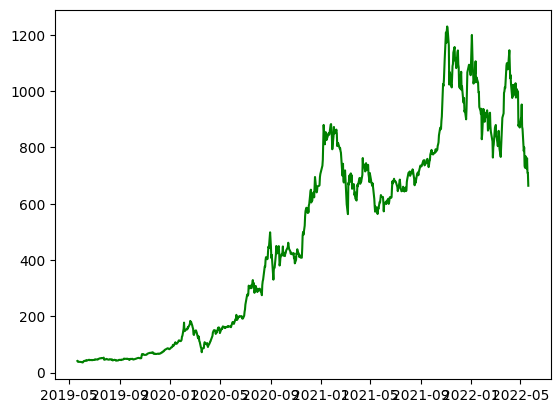

In [17]:
plt.plot(stock_data,color='green')

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

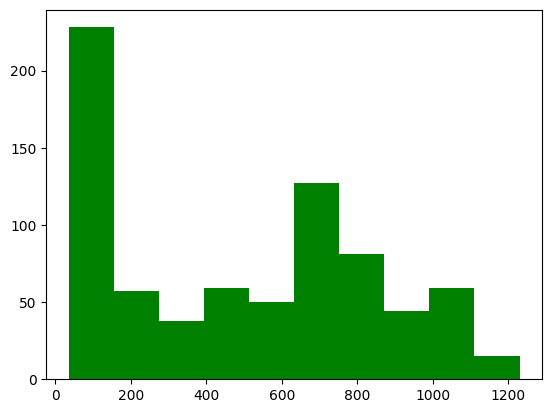

In [18]:
plt.hist(stock_data.Close,color='green')

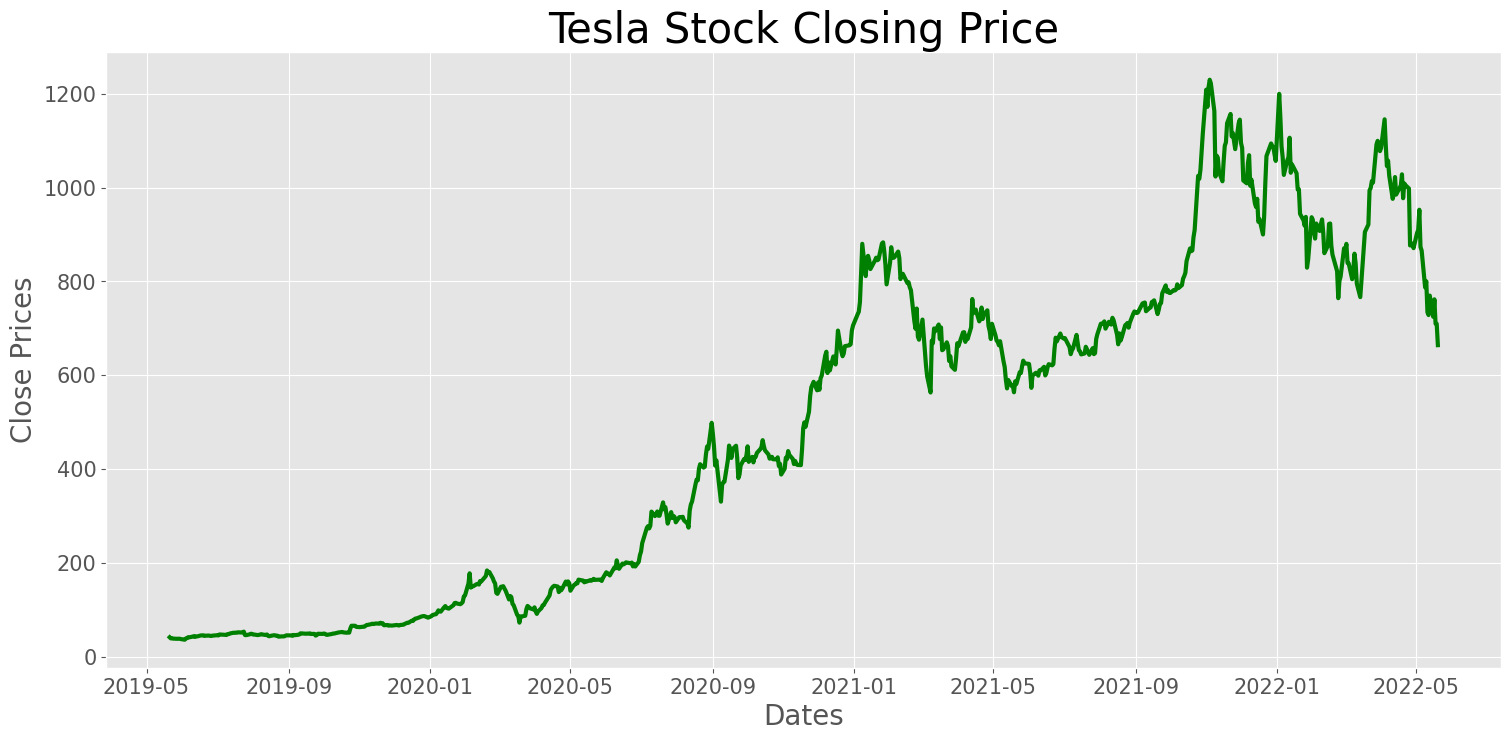

In [19]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data['Close'], linewidth = 3, color = 'green')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

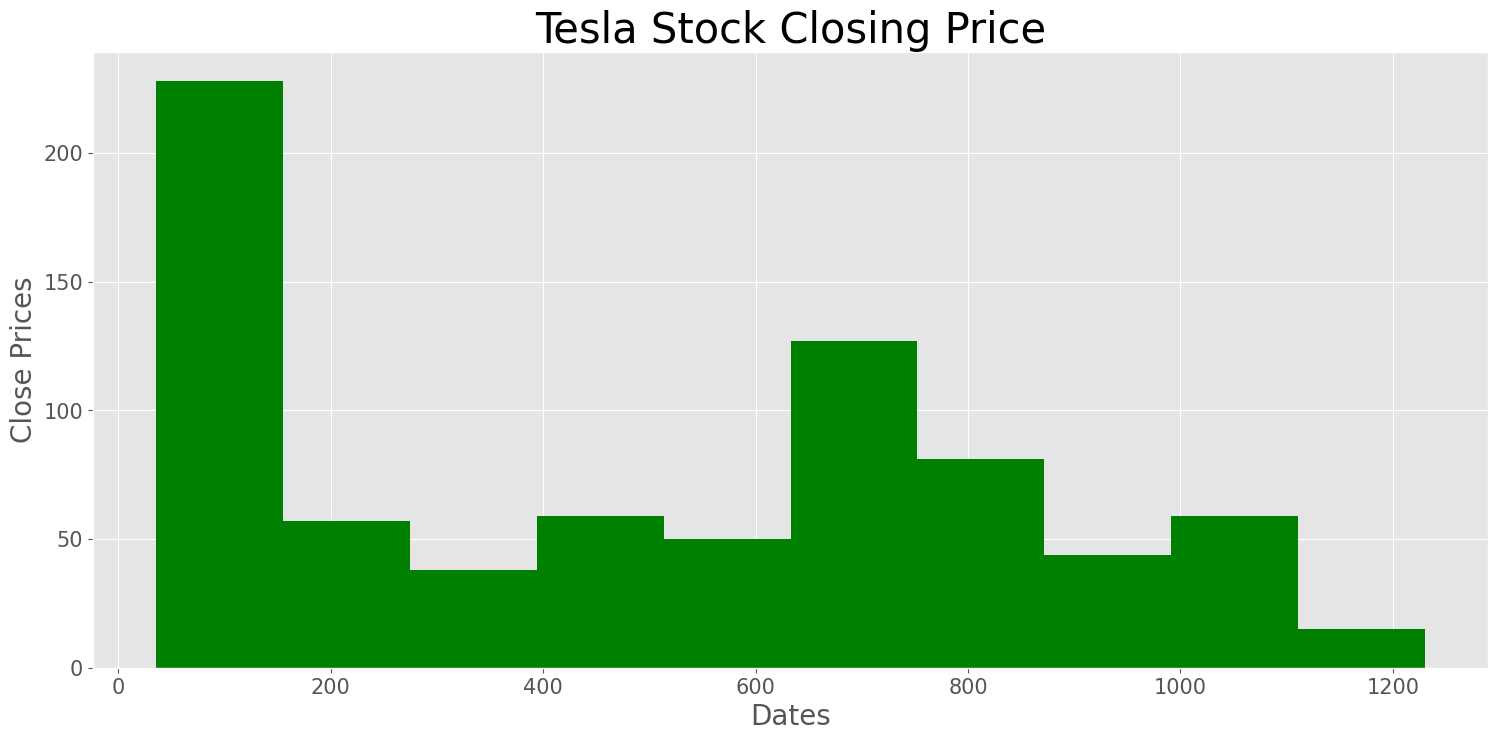

In [20]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('Dates', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'green')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

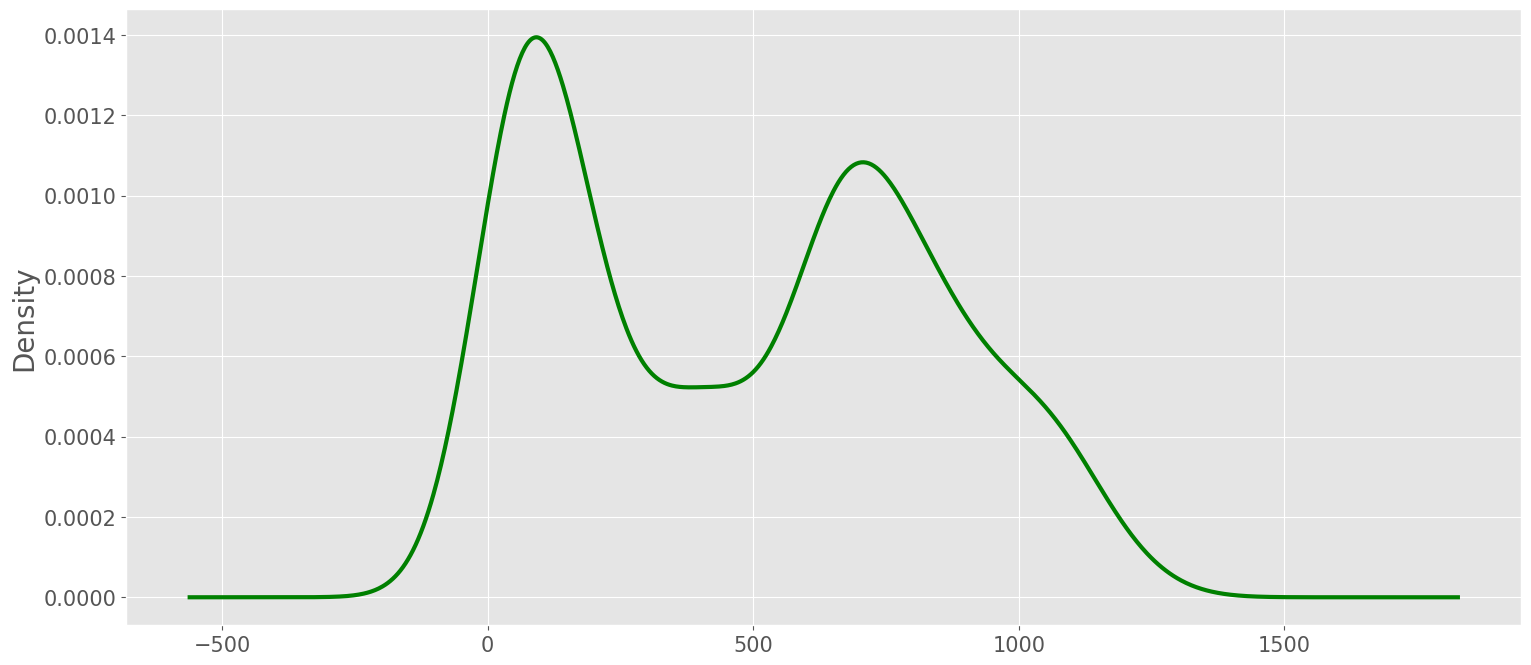

In [21]:
# Distribution of the close price  
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3,color='green') 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

- The rolling mean function in Pandas allows for window-based calculations, where the window size determines the number of observations considered for each mean calculation. In this context, a rolling window of 12 means that the mean is calculated based on the last 12 observations in the 'Close' column.

- This rolling mean operation is particularly useful for time-series data analysis, providing insights into trends and patterns over specific intervals. By using rolling functions like .rolling() and .mean(), you can efficiently analyze data with a moving window approach, which is common in financial and statistical analysis

In [22]:
rolmean = stock_data['Close'].rolling(12).mean()

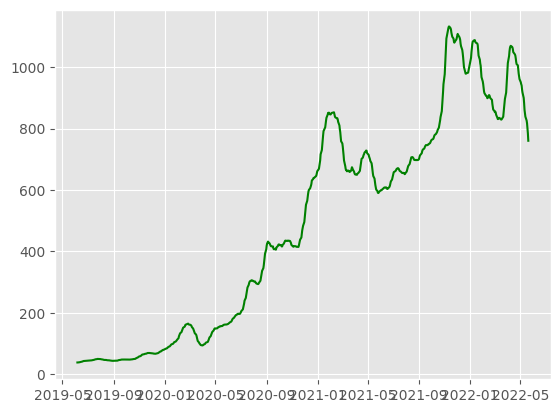

In [23]:
plt.plot(rolmean,color='green')

As the window size increase the smoothening of the curve also increases as follows;

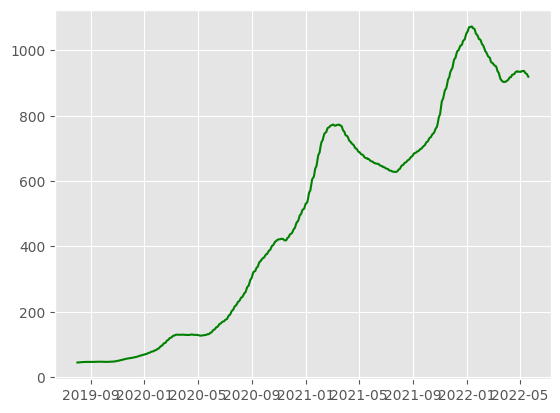

In [24]:
rolmean = stock_data['Close'].rolling(52).mean()
plt.plot(rolmean,color='green')

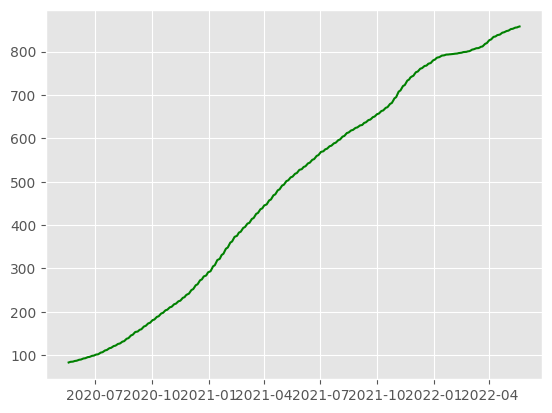

In [25]:
rolmean = stock_data['Close'].rolling(252).mean()
plt.plot(rolmean,color='green')

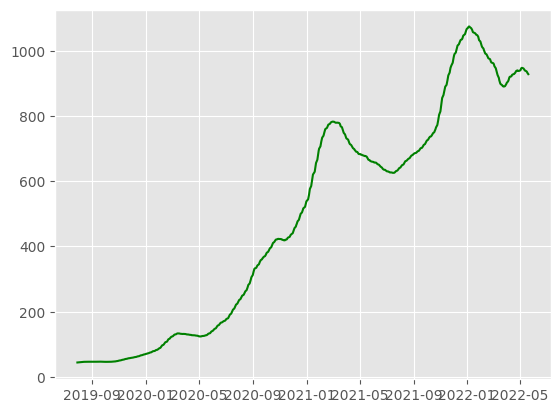

In [26]:
rolmean = stock_data['Close'].rolling(48).mean()
plt.plot(rolmean,color='green')

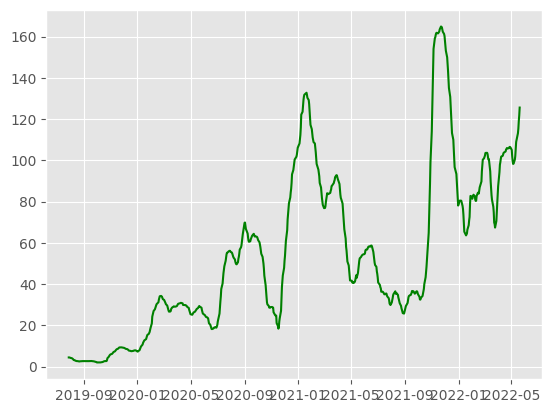

In [27]:
rolstd = stock_data['Close'].rolling(48).std()
plt.plot(rolstd,color='green')

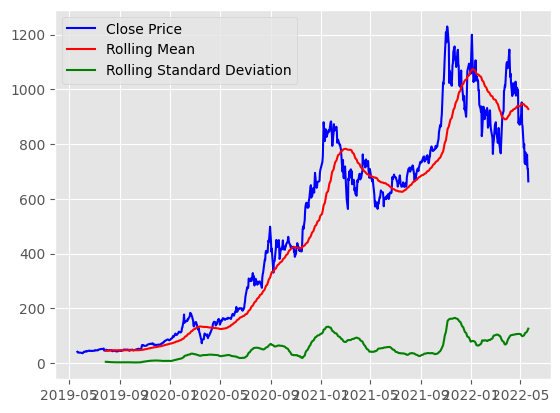

In [28]:
#visualizing the 3 contents in one graph 
plt.plot(stock_data['Close'], color='blue', label='Close Price')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='green', label='Rolling Standard Deviation')
plt.legend()
plt.show()

Here the Time series is  not stationary , since the mean is growing exponentially and not constant . 

**The Augmented Dickey-Fuller (ADF)** test is a statistical test used to determine if a unit root is present in a time series sample. The null hypothesis of the test is that a unit root exists, indicating non-stationarity in the data. The alternative hypothesis varies depending on the version of the test used, often implying stationarity or trend-stationarity

There are three main versions of the Dickey-Fuller test:

1. Type 0: No constant, no trend
2. Type 1: Constant, no trend
3. Type 2: Constant and trend

Each version uses different critical values for testing the presence of a unit root in the time series data. Selecting the appropriate version is crucial for accurate analysis

In [29]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


Hypothesis 

Ho: Data is not stationary
 
H1: Data is Stationary 

In [30]:
# ADF(Ada Fuller Test )
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])


In [31]:
adft 

(-1.3630085817037496,
 0.5998762543050695,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

* test statistic = -1.3630085817037496
* p-value = 0.5998762543050695
* lag = 9 
* total no.of data points = 748

* Critical values at different significance levels:
    -  1%: -3.43912257105195
    - 5%: -2.8654117005229844
    - 10%: -2.568831705010152

* Maximized information criterion if autolag is not None: 6794.359259220987

In [32]:
pd.Series(adft[0:4],index=['Test_Statistic','p_value','lag','Total_Data_points'])

Test_Statistic        -1.363009
p_value                0.599876
lag                    9.000000
Total_Data_points    748.000000
dtype: float64

If p<=0.5, reject null hypothesis 

if p>0.5 fails to reject null hypothesis 

So here we fails to reject the null hypothesis , ie., the data is not stationary

### There are two methods to find out whether the data is stationary or not ,
1. is through visualization 
2. is through statistical test 


### 3. Stationarity Check

Defined a function for all the above steps as follows;

In [33]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    if adft[1] <=0.5:
        print('Reject null hypothesis,hence the data is stationary')
    else:    
        print('Failed to reject null hypothesis,hence the data is non-stationary')

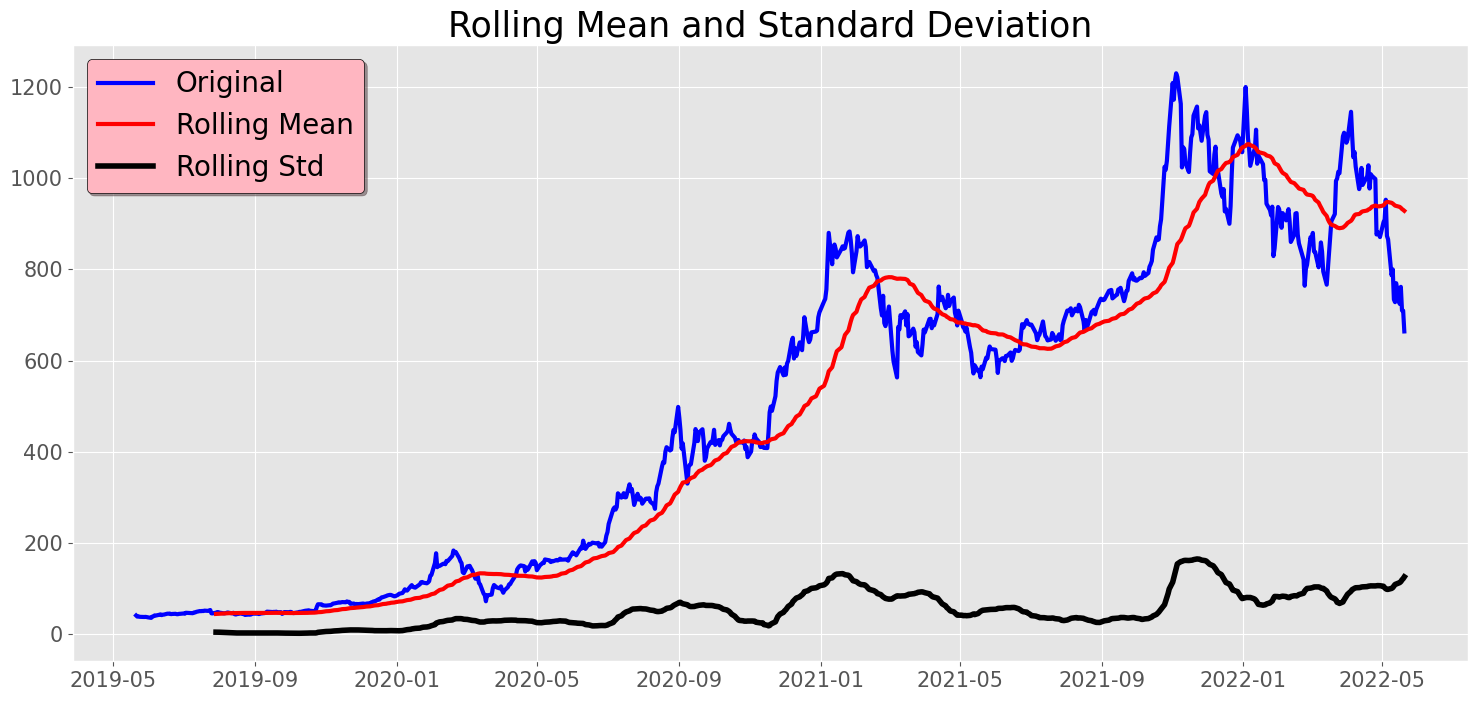

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64
Failed to reject null hypothesis,hence the data is non-stationary


In [34]:
test_stationarity(stock_data.Close)

### Now we have to decompose the data into components 

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
result= seasonal_decompose(stock_data[['Close']],period=12) #bydefault = additive 

#period=12: This parameter specifies the period of seasonality in the time series. In this case, it's set to 12, indicating that you're assuming there's a seasonal pattern repeating every 12 data points (e.g., months if your data is monthly).

In [36]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

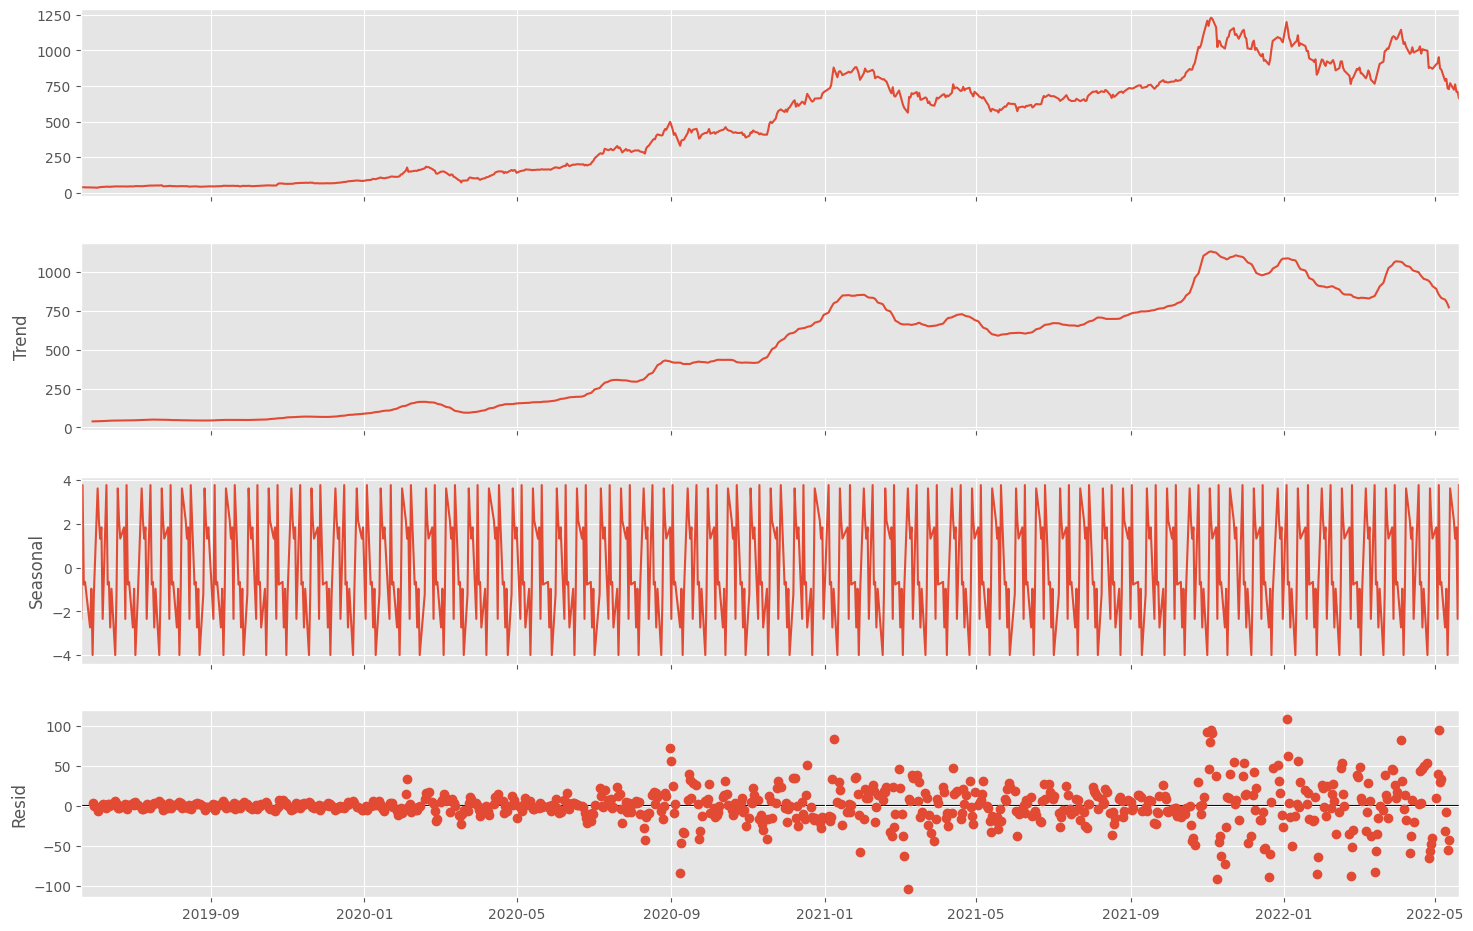

In [37]:
fig = plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

Composed the data into ;
1. actual data 
2. trend 
3. seasonal 
4. Residual

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
result1= seasonal_decompose(stock_data[['Close']],period=12,model='multiplicative') #model = additive 

<Figure size 2000x1000 with 0 Axes>

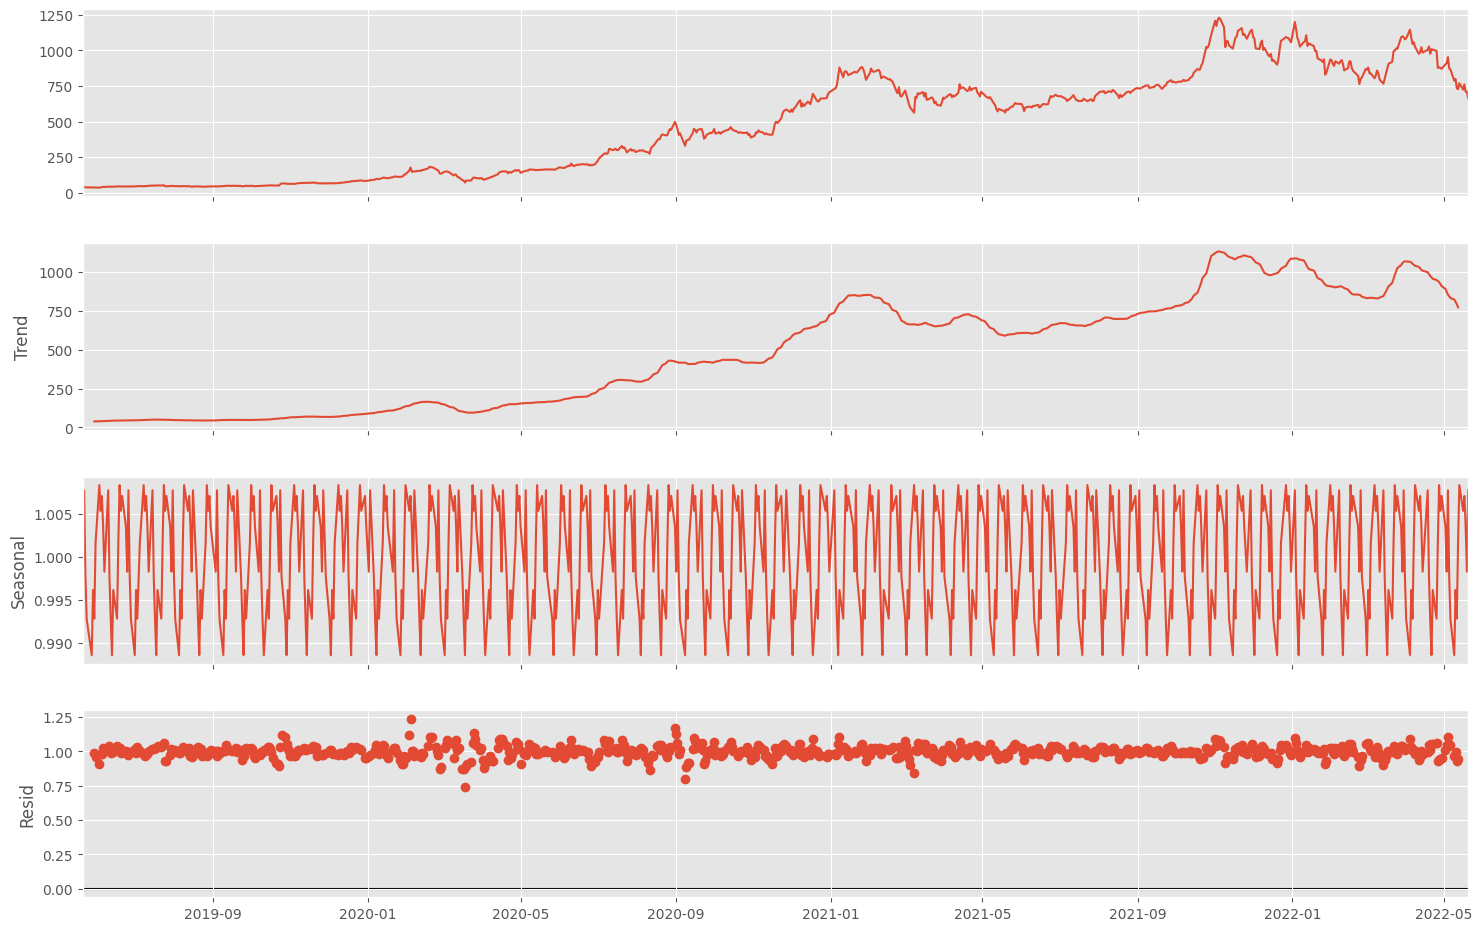

In [39]:
fig = plt.figure(figsize=(20,10))
fig=result1.plot()
fig.set_size_inches(17,10)

Checking for outliers ;


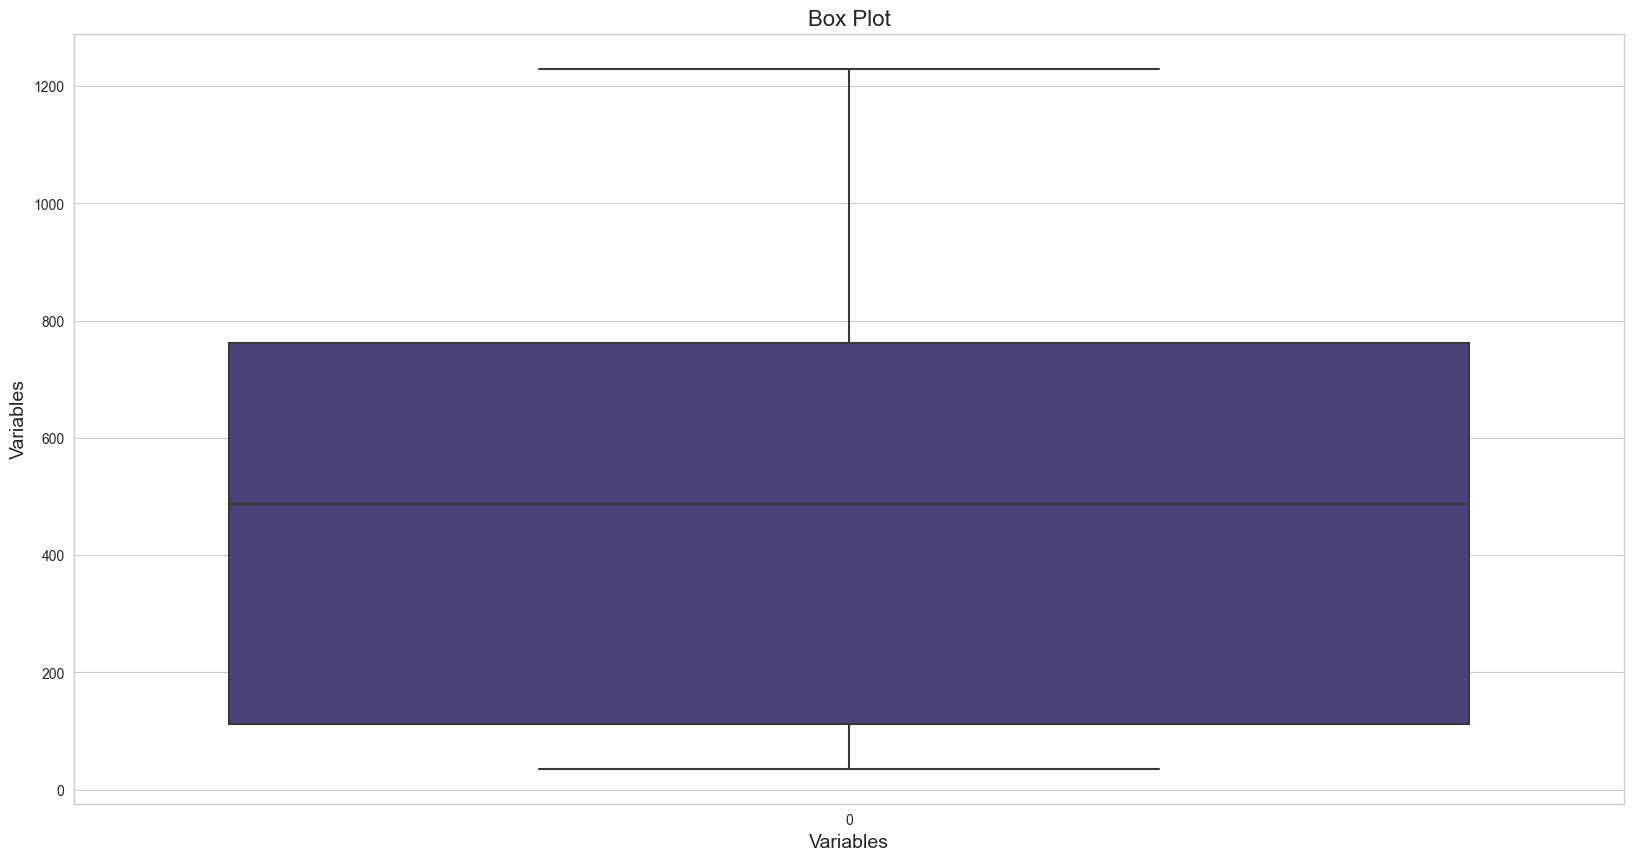

In [40]:
import seaborn as sns 

# Set Seaborn style
sns.set_style("whitegrid")

# Set custom color palette
custom_palette = sns.color_palette("viridis", n_colors=5)  # You can choose any other palette you prefer

# Create boxplot
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(data=stock_data['Close'], ax=ax, palette=custom_palette)

# Set labels and title
ax.set_xlabel('Variables', fontsize=14)
ax.set_ylabel('Variables', fontsize=14)
ax.set_title('Box Plot', fontsize=16)

plt.show()

There is no outliers 

### 4. Check for Autocorrelation

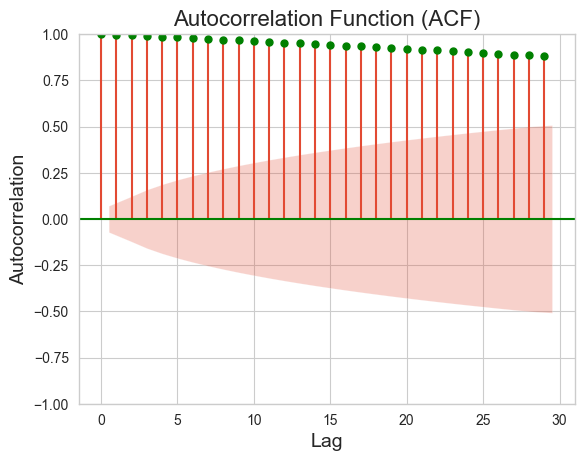

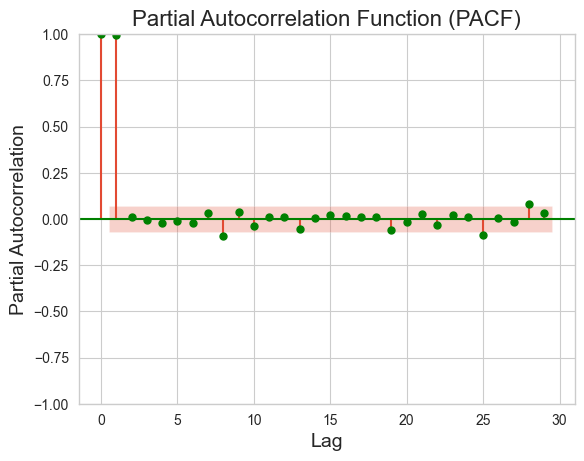

In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


# Plot ACF
plot_acf(stock_data.Close, color='green')
plt.title('Autocorrelation Function (ACF)', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.show()

# Plot PACF
plot_pacf(stock_data.Close, color='green')
plt.title('Partial Autocorrelation Function (PACF)', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14)
plt.show()

ACF representing the correlation ,you can see correlation on every values almost same , because the time series is non stationary. 
after converting it into stationary we can see the effect  

Pacf represents the partial autocorrelation , here it removes the intermediate effect and calculates the correlation

## Preprocessing 

In [42]:
stock_data.isnull().sum()

Close    0
dtype: int64

no missing values 
and we obtained before that the data contains no outliers 


Now we are converting the non-stationary data into stationary one 

In [43]:
close_data = stock_data['Close']
close_data


Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [44]:
close_data = close_data.diff() # bydefault differncing = 1 / first differencing 
close_data

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [45]:
close_data.dropna()

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

now we have to check whether the data is stationary or not ?


In [46]:
close_data.isnull()

Date
2019-05-21     True
2019-05-22    False
2019-05-23    False
2019-05-24    False
2019-05-28    False
              ...  
2022-05-16    False
2022-05-17    False
2022-05-18    False
2022-05-19    False
2022-05-20    False
Name: Close, Length: 758, dtype: bool

In [47]:
close_data = close_data.drop(close_data.index[0])

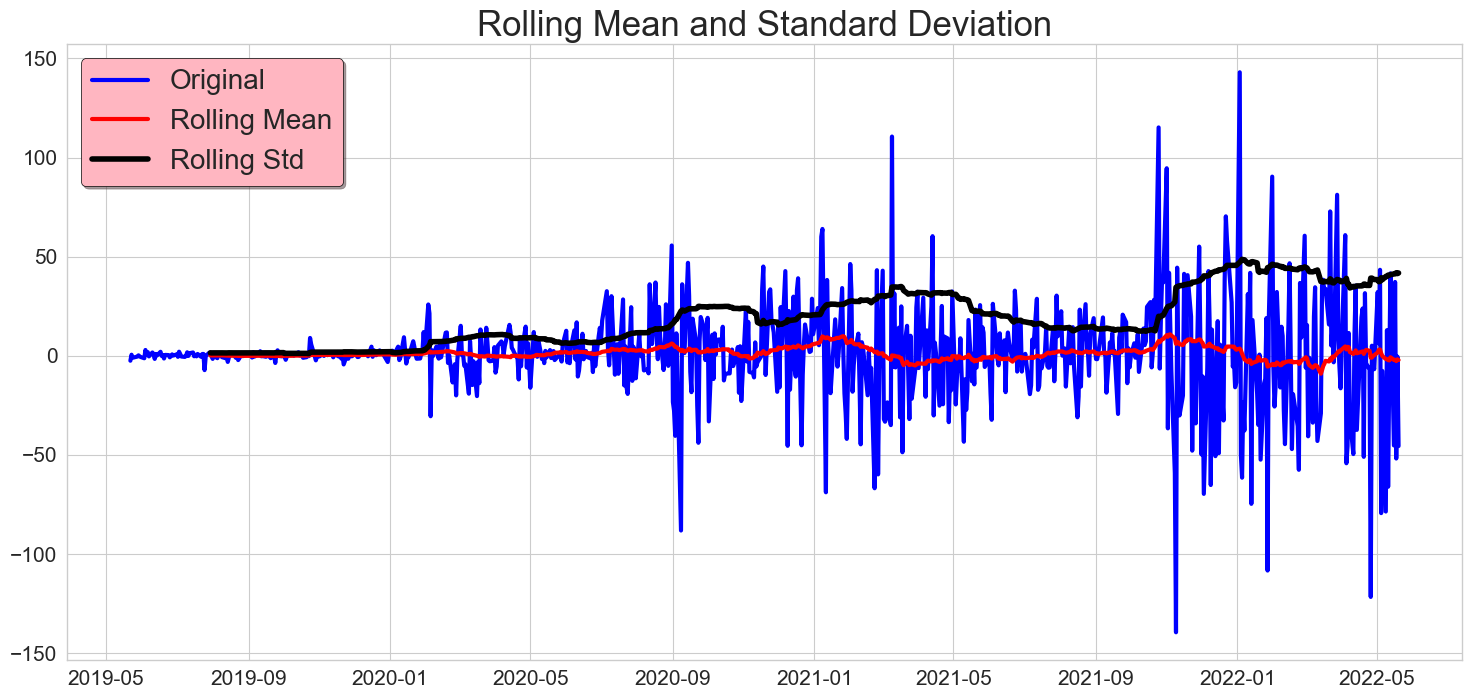

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64
Reject null hypothesis,hence the data is stationary


In [48]:
test_stationarity(close_data)

Succesfully converted into stationary data 

Now we are going to plot the ACF and PACF 

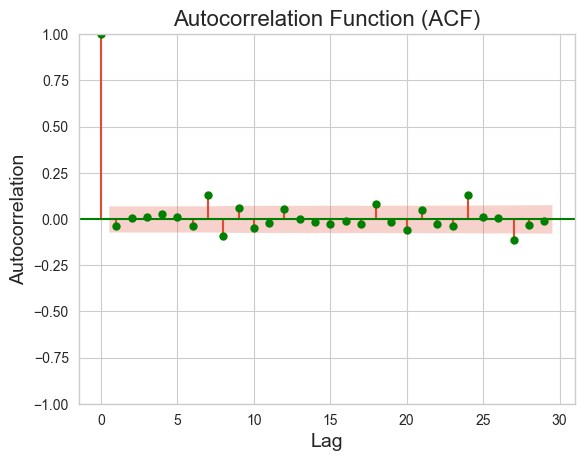

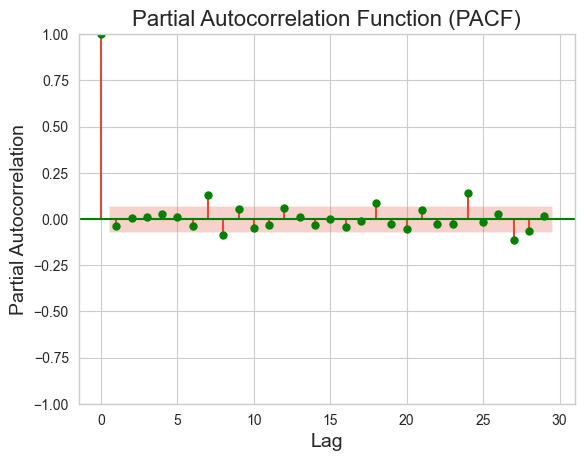

In [49]:
# Plot ACF
plot_acf(close_data, color='green')
plt.title('Autocorrelation Function (ACF)', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.show()

# Plot PACF
plot_pacf(close_data, color='green')
plt.title('Partial Autocorrelation Function (PACF)', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Partial Autocorrelation', fontsize=14)
plt.show()

In [50]:
close_data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 757 entries, 2019-05-22 to 2022-05-20
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
757 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


Train-Test Split 

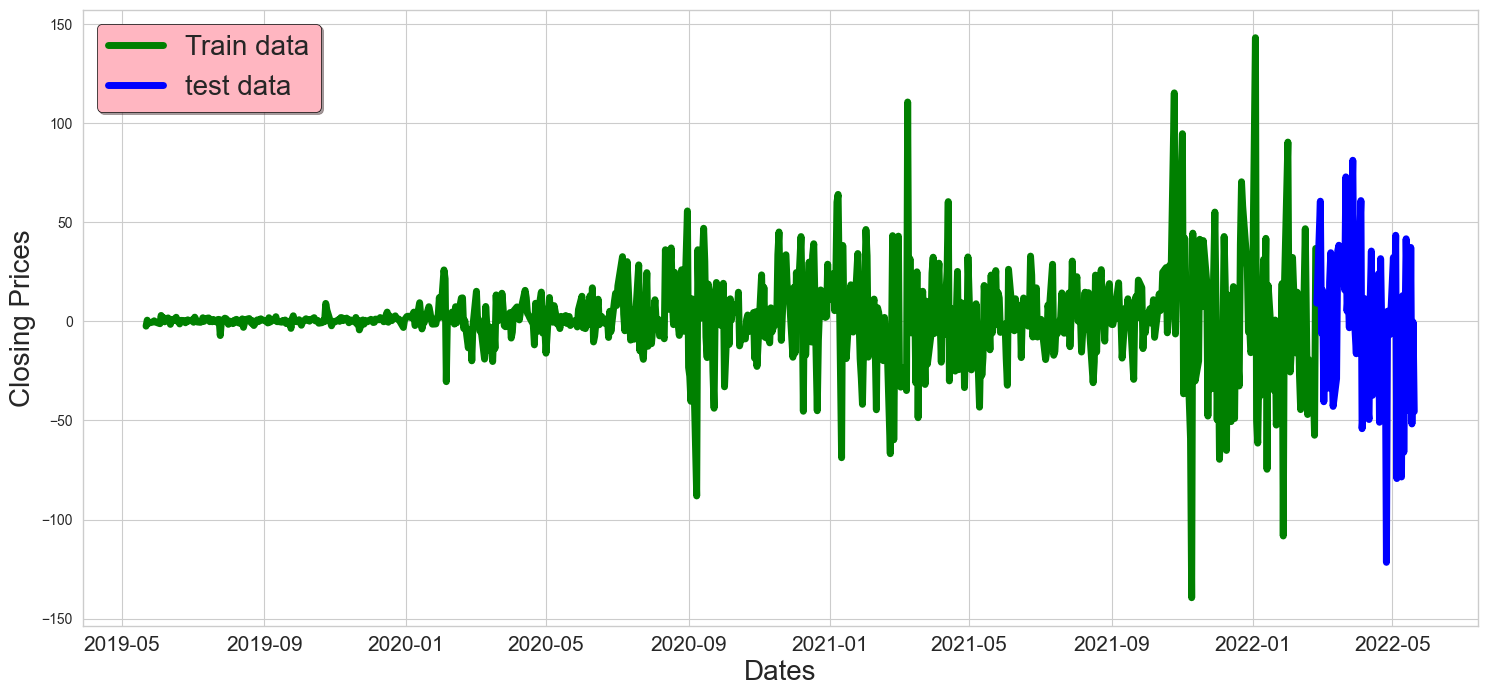

In [51]:
#split the data int6o train and test 
train_data = close_data[0:-60]
test_data = close_data[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Closing Prices',fontsize=20)
plt.xticks(fontsize=15)
plt.plot(train_data,'green',label='Train data',linewidth=5)
plt.plot(test_data,'blue',label='test data',linewidth=5)
plt.legend(fontsize=20,shadow=True , facecolor ='lightpink',edgecolor='k')

# 4. Model Building 

In [52]:
import statsmodels.api as sm 
from statsmodels.tsa.arima.model import ARIMA 

from sklearn.metrics import mean_squared_error 


In [53]:
history = [x for x in train_data]

In [54]:
model = ARIMA(history,order=(1,1,1))

The ARIMA model, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm that utilizes past values of a time series to predict future values. The notation ARIMA(history, order=(1,1,1)) specifies the parameters of the ARIMA model as follows:

* p (AR term): Represents the order of the AutoRegressive (AR) term, which captures the relationship between an observation and its lagged values.

* d (Integrated term): Denotes the degree of differencing required to make the time series stationary. Differencing involves subtracting the previous value from the current value to remove trends and seasonality.

* q (MA term): Indicates the order of the Moving Average (MA) term, which focuses on the relationship between an observation and residual errors from a moving average model

In [55]:
model = model.fit()

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  697
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3148.870
Date:                Mon, 11 Mar 2024   AIC                           6303.741
Time:                        13:16:56   BIC                           6317.377
Sample:                             0   HQIC                          6309.013
                                - 697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.025     -1.150      0.250      -0.077       0.020
ma.L1         -0.9991      0.012    -81.342      0.000      -1.023      -0.975
sigma2       493.6006     12.978     38.035      0.000     468.165     519.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2092.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              31.85   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now we have to forecast the values 

In [57]:
model.forecast()

array([0.04741638])

It predicts the next value 

In [58]:
model.predict()

array([ 0.00000000e+00, -2.46870913e+00, -1.00183874e+00, -9.48264606e-01,
       -8.22444320e-01, -6.26828179e-01, -5.60599704e-01, -5.59905112e-01,
       -6.27410046e-01, -3.48851631e-01, -1.87280361e-01, -3.54443817e-02,
        4.87343184e-03,  7.79304248e-02,  1.56584268e-01,  1.09938566e-01,
        9.01654350e-02,  1.17517751e-01,  1.71774479e-01,  2.18936467e-01,
        2.13618418e-01,  1.86843359e-01,  1.47150290e-01,  1.58876191e-01,
        1.52096284e-01,  1.22742069e-01,  1.22388283e-01,  1.39266396e-01,
        1.43222727e-01,  1.56254430e-01,  1.46234154e-01,  1.99139494e-01,
        1.81092988e-01,  1.59755701e-01,  1.55157194e-01,  2.01219903e-01,
        1.92919466e-01,  2.22232693e-01,  2.64857008e-01,  2.50270463e-01,
        2.59054922e-01,  2.41420963e-01,  2.64442931e-01,  2.39351917e-01,
        2.54094794e-01,  3.20326737e-01,  1.08818719e-01,  9.09338360e-02,
        1.23194058e-01,  1.58723756e-01,  1.64984446e-01,  1.16634662e-01,
        1.28307458e-01,  

It predicts the range of values 

In [59]:
test_data

Date
2022-02-25      9.099976
2022-02-28     60.559998
2022-03-01     -6.059998
2022-03-02     15.520020
2022-03-03    -40.600037
2022-03-04     -1.000000
2022-03-07    -33.709961
2022-03-08     19.820007
2022-03-09     34.569946
2022-03-10    -20.669983
2022-03-11    -42.950012
2022-03-14    -28.979980
2022-03-15     35.520020
2022-03-16     38.339966
2022-03-17     31.369995
2022-03-18     33.790039
2022-03-21     15.769958
2022-03-22     72.820007
2022-03-23      5.130005
2022-03-24     14.809998
2022-03-25     -3.279968
2022-03-28     81.199951
2022-03-29      7.729980
2022-03-30     -5.579956
2022-03-31    -16.390015
2022-04-01      6.989990
2022-04-04     60.859985
2022-04-05    -54.189941
2022-04-06    -45.500000
2022-04-07     11.500000
2022-04-08    -31.770020
2022-04-11    -49.559998
2022-04-12     11.020020
2022-04-13     35.419983
2022-04-14    -37.369995
2022-04-18     19.289978
2022-04-19     23.860046
2022-04-20    -50.950012
2022-04-21     31.580017
2022-04-22     -3.73

In [60]:
test_data[0]

9.0999755859375

In [62]:
mean_squared_error([test_data[0]],model.forecast())

81.94882822933381

In [63]:
p_values= range(0,3)
d_values= range(0,3)
q_values= range(0,3)

In [64]:
for i in p_values:
    for j in d_values:
        for k in q_values:
            print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [65]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [66]:
def evaluate_models(dataset,test,p_values,d_values,q_values):
    dataset = dataset.astype('float32')
    best_score,best_cfg = float('inf'),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order= (p,d,q)
                try:
                    rmse= train_arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score,best_cfg=rmse,order
                    print("ARIMA%s RMSE=%.3f" %(order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg,best_score))                    
            